# TRAFFIC SIGN CLASSIFICATION USING LE-NET ARCHITECTURE IN KERAS

# PROBLEM STATEMENT

- In this case study, images of traffic signs are provided and the goal is to train a Deep Network to classify them. 
  The dataset contains 43 different classes of images.
- The network used is called Le-Net that was presented by Yann LeCun
  http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# IMPORT LIBRARIES AND DATASET

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [4]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [11]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

# IMAGE EXPLORATION

36

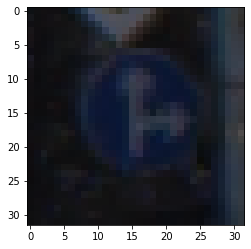

In [16]:
i = 998
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# DATA PEPARATION

In [17]:
# Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [18]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [19]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [27]:
X_train_gray.shape

(34799, 32, 32, 1)

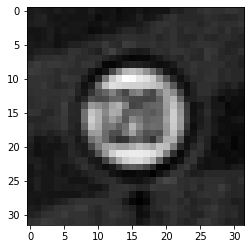

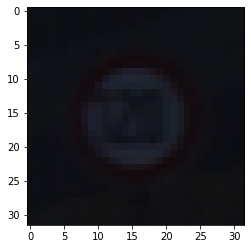

In [28]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

# MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [31]:
image_shape = X_train_gray[i].shape

In [32]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [33]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [35]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=100,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/100
70/70 [==============================] - 9s 131ms/step - loss: 3.1359 - accuracy: 0.1899 - val_loss: 2.4892 - val_accuracy: 0.3569
Epoch 2/100
70/70 [==============================] - 9s 127ms/step - loss: 1.5250 - accuracy: 0.5700 - val_loss: 1.2090 - val_accuracy: 0.6408
Epoch 3/100
70/70 [==============================] - 9s 124ms/step - loss: 0.8148 - accuracy: 0.7712 - val_loss: 0.8628 - val_accuracy: 0.7483
Epoch 4/100
70/70 [==============================] - 9s 128ms/step - loss: 0.5866 - accuracy: 0.8385 - val_loss: 0.7334 - val_accuracy: 0.7798
Epoch 5/100
70/70 [==============================] - 9s 123ms/step - loss: 0.4623 - accuracy: 0.8770 - val_loss: 0.6490 - val_accuracy: 0.8143
Epoch 6/100
70/70 [==============================] - 9s 127ms/step - loss: 0.3859 - accuracy: 0.9009 - val_loss: 0.5951 - val_accuracy: 0.8268
Epoch 7/100
70/70 [==============================] - 9s 123ms/step - loss: 0.3301 - accuracy: 0.9151 - val_loss: 0.5740 - val_accuracy: 0.8338

Epoch 58/100
70/70 [==============================] - 9s 126ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.6224 - val_accuracy: 0.8891
Epoch 59/100
70/70 [==============================] - 9s 127ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.5746 - val_accuracy: 0.8973
Epoch 60/100
70/70 [==============================] - 9s 128ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.5669 - val_accuracy: 0.9000
Epoch 61/100
70/70 [==============================] - 9s 127ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.6109 - val_accuracy: 0.8855
Epoch 62/100
70/70 [==============================] - 9s 128ms/step - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.6064 - val_accuracy: 0.8950
Epoch 63/100
70/70 [==============================] - 9s 126ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.5214 - val_accuracy: 0.9025
Epoch 64/100
70/70 [==============================] - 9s 131ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.6050 - val_accuracy:

# MODEL EVALUATION

In [36]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8907


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

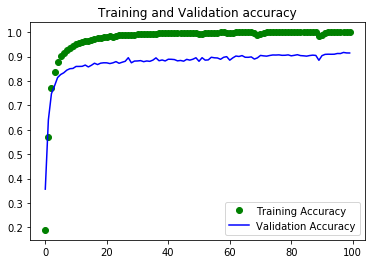

In [43]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy', color = 'green')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

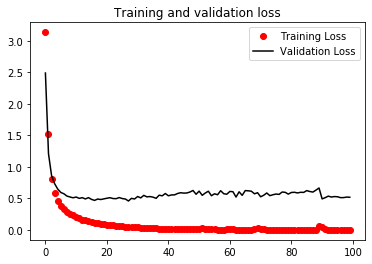

In [49]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss', color = 'black')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
#get the predictions for the test data
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis=-1) #cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

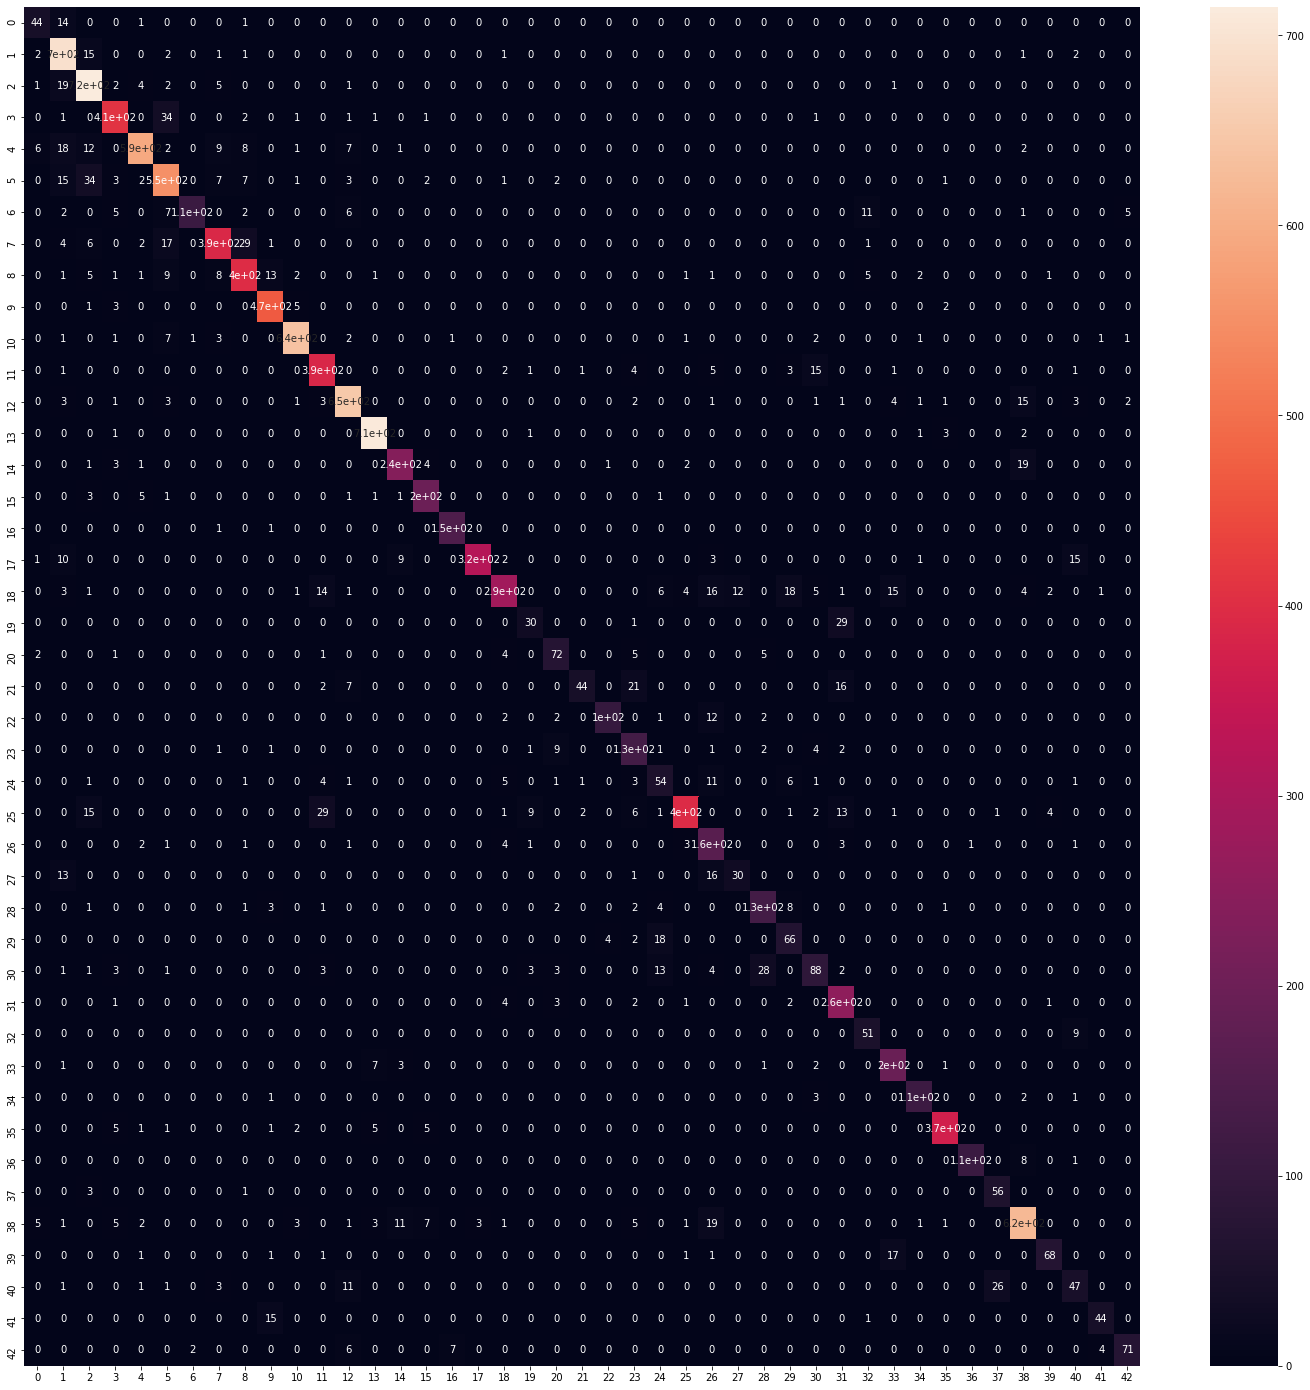

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

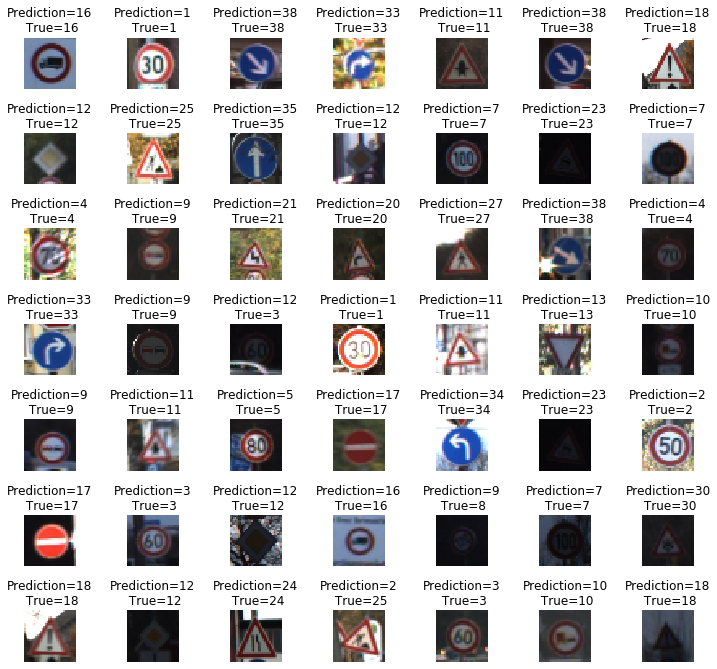

In [61]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 